In [2]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset from the zip file
# Assuming the zip has a single CSV file inside
zip_filename = 'forest_fire_dataset.csv.zip'
df = pd.read_csv('/content/forestfires.csv')
df.head()



,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\
Dataset info:")
print(df.info())
print("\
Descriptive statistics:")
print(df.describe())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Dataset shape: (517, 13)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
Descriptive statistics:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the zip file
# Assuming the zip has a single CSV file inside
zip_filename = 'forest_fire_dataset.csv.zip'
df = pd.read_csv('/content/forestfires.csv')
df.head()

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\
Dataset info:")
print(df.info())
print("\
Descriptive statistics:")
print(df.describe())

# Check for missing values
print("\
Missing values:")
print(df.isnull().sum())

Dataset shape: (517, 13)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
Descriptive statistics:
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.

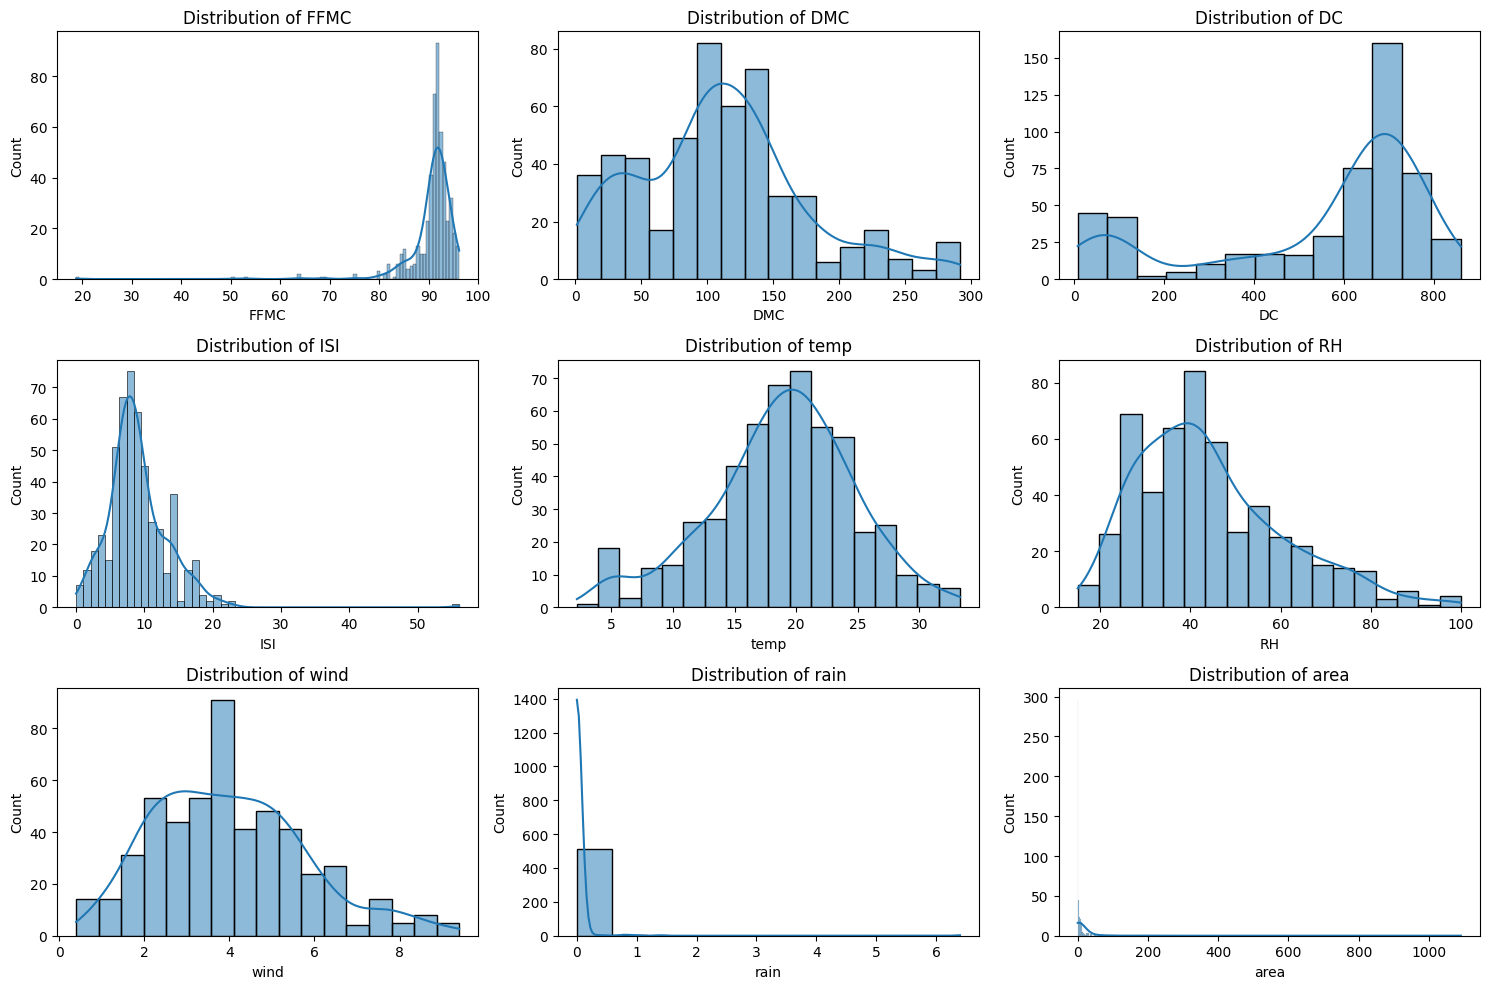

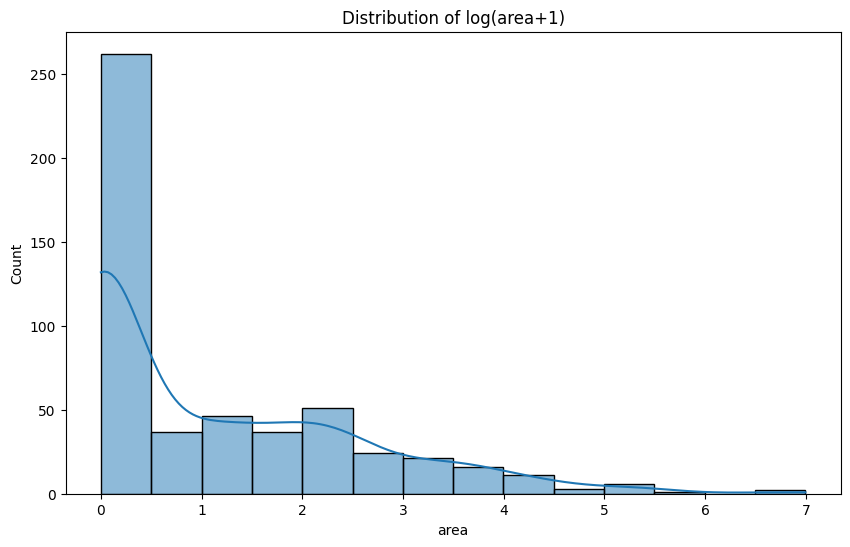

Histograms created for numerical features


In [9]:
# 1. Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.savefig('numerical_histograms.png')
plt.show()

# Since 'area' has a skewed distribution, let's also plot it with log transformation
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['area']), kde=True)
plt.title('Distribution of log(area+1)')
plt.savefig('log_area_histogram.png')
plt.show()

print("Histograms created for numerical features")

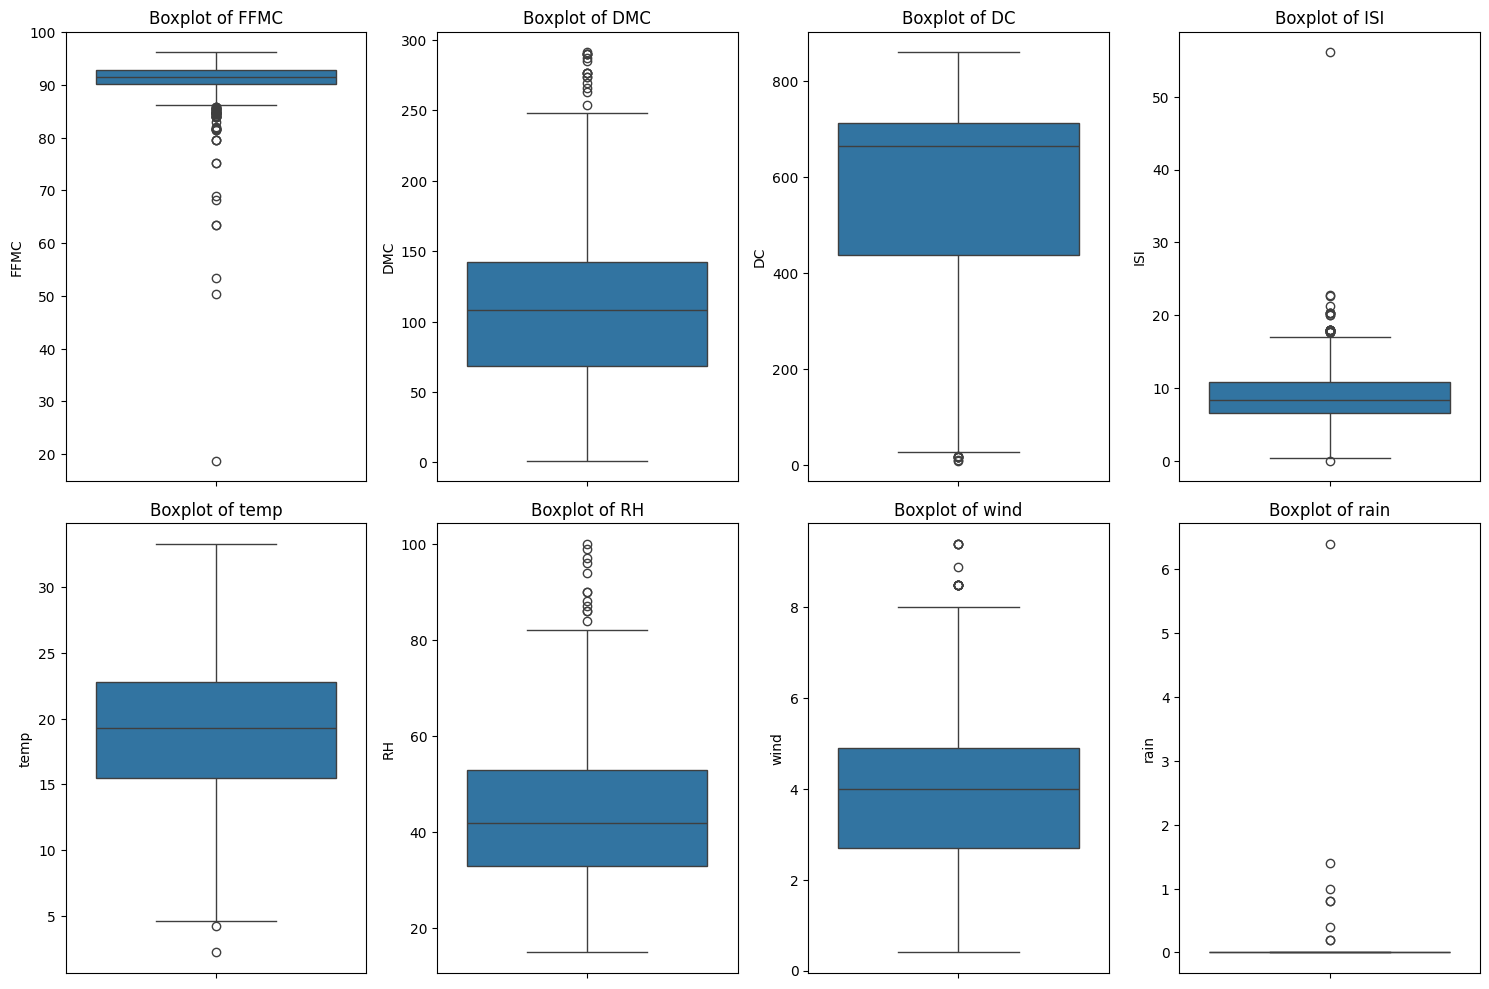

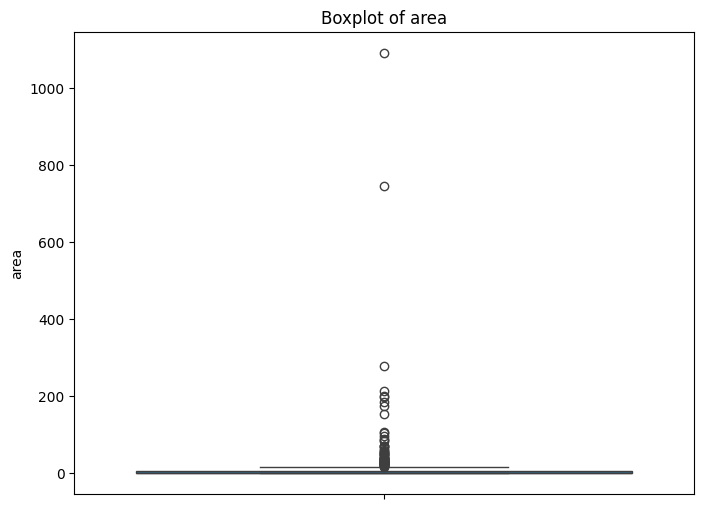

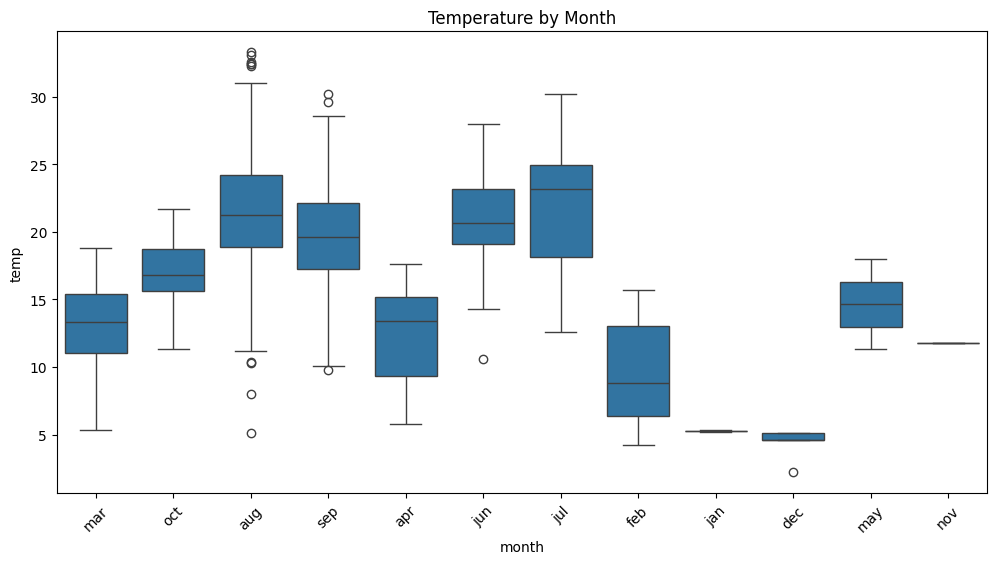

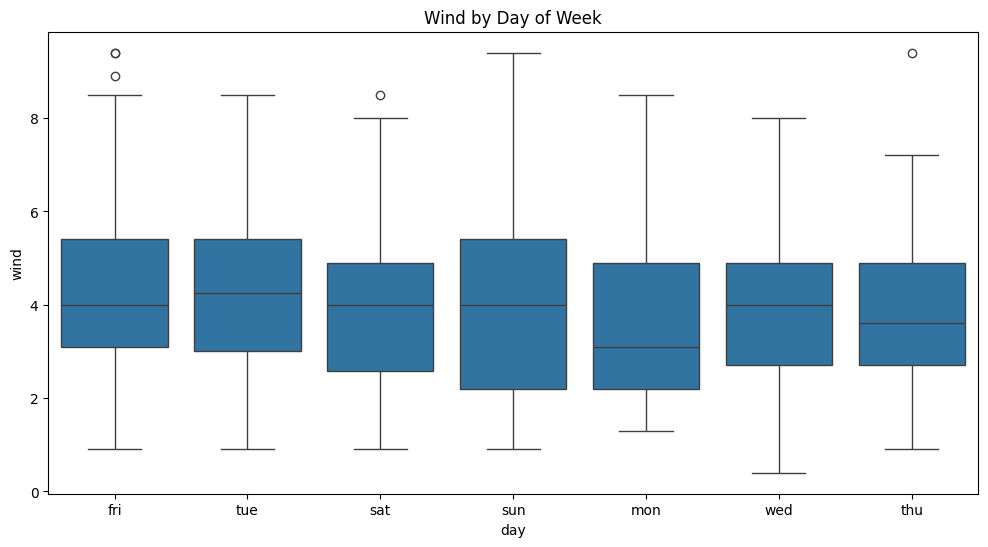

Boxplots created for numerical features


In [10]:
# Create boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('numerical_boxplots.png')
plt.show()

# Separate boxplot for 'area' due to its scale
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['area'])
plt.title('Boxplot of area')
plt.savefig('area_boxplot.png')
plt.show()

# Boxplots by month for temperature
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='temp', data=df)
plt.title('Temperature by Month')
plt.xticks(rotation=45)
plt.savefig('temp_by_month_boxplot.png')
plt.show()

# Boxplots by day for wind
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='wind', data=df)
plt.title('Wind by Day of Week')
plt.savefig('wind_by_day_boxplot.png')
plt.show()

print("Boxplots created for numerical features")

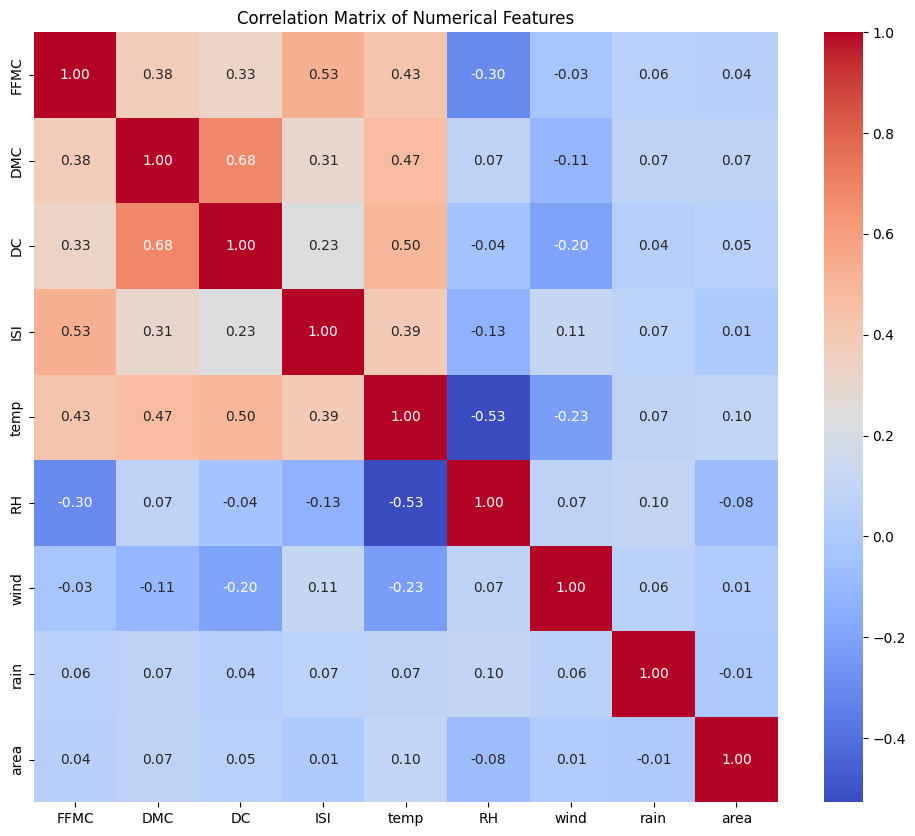

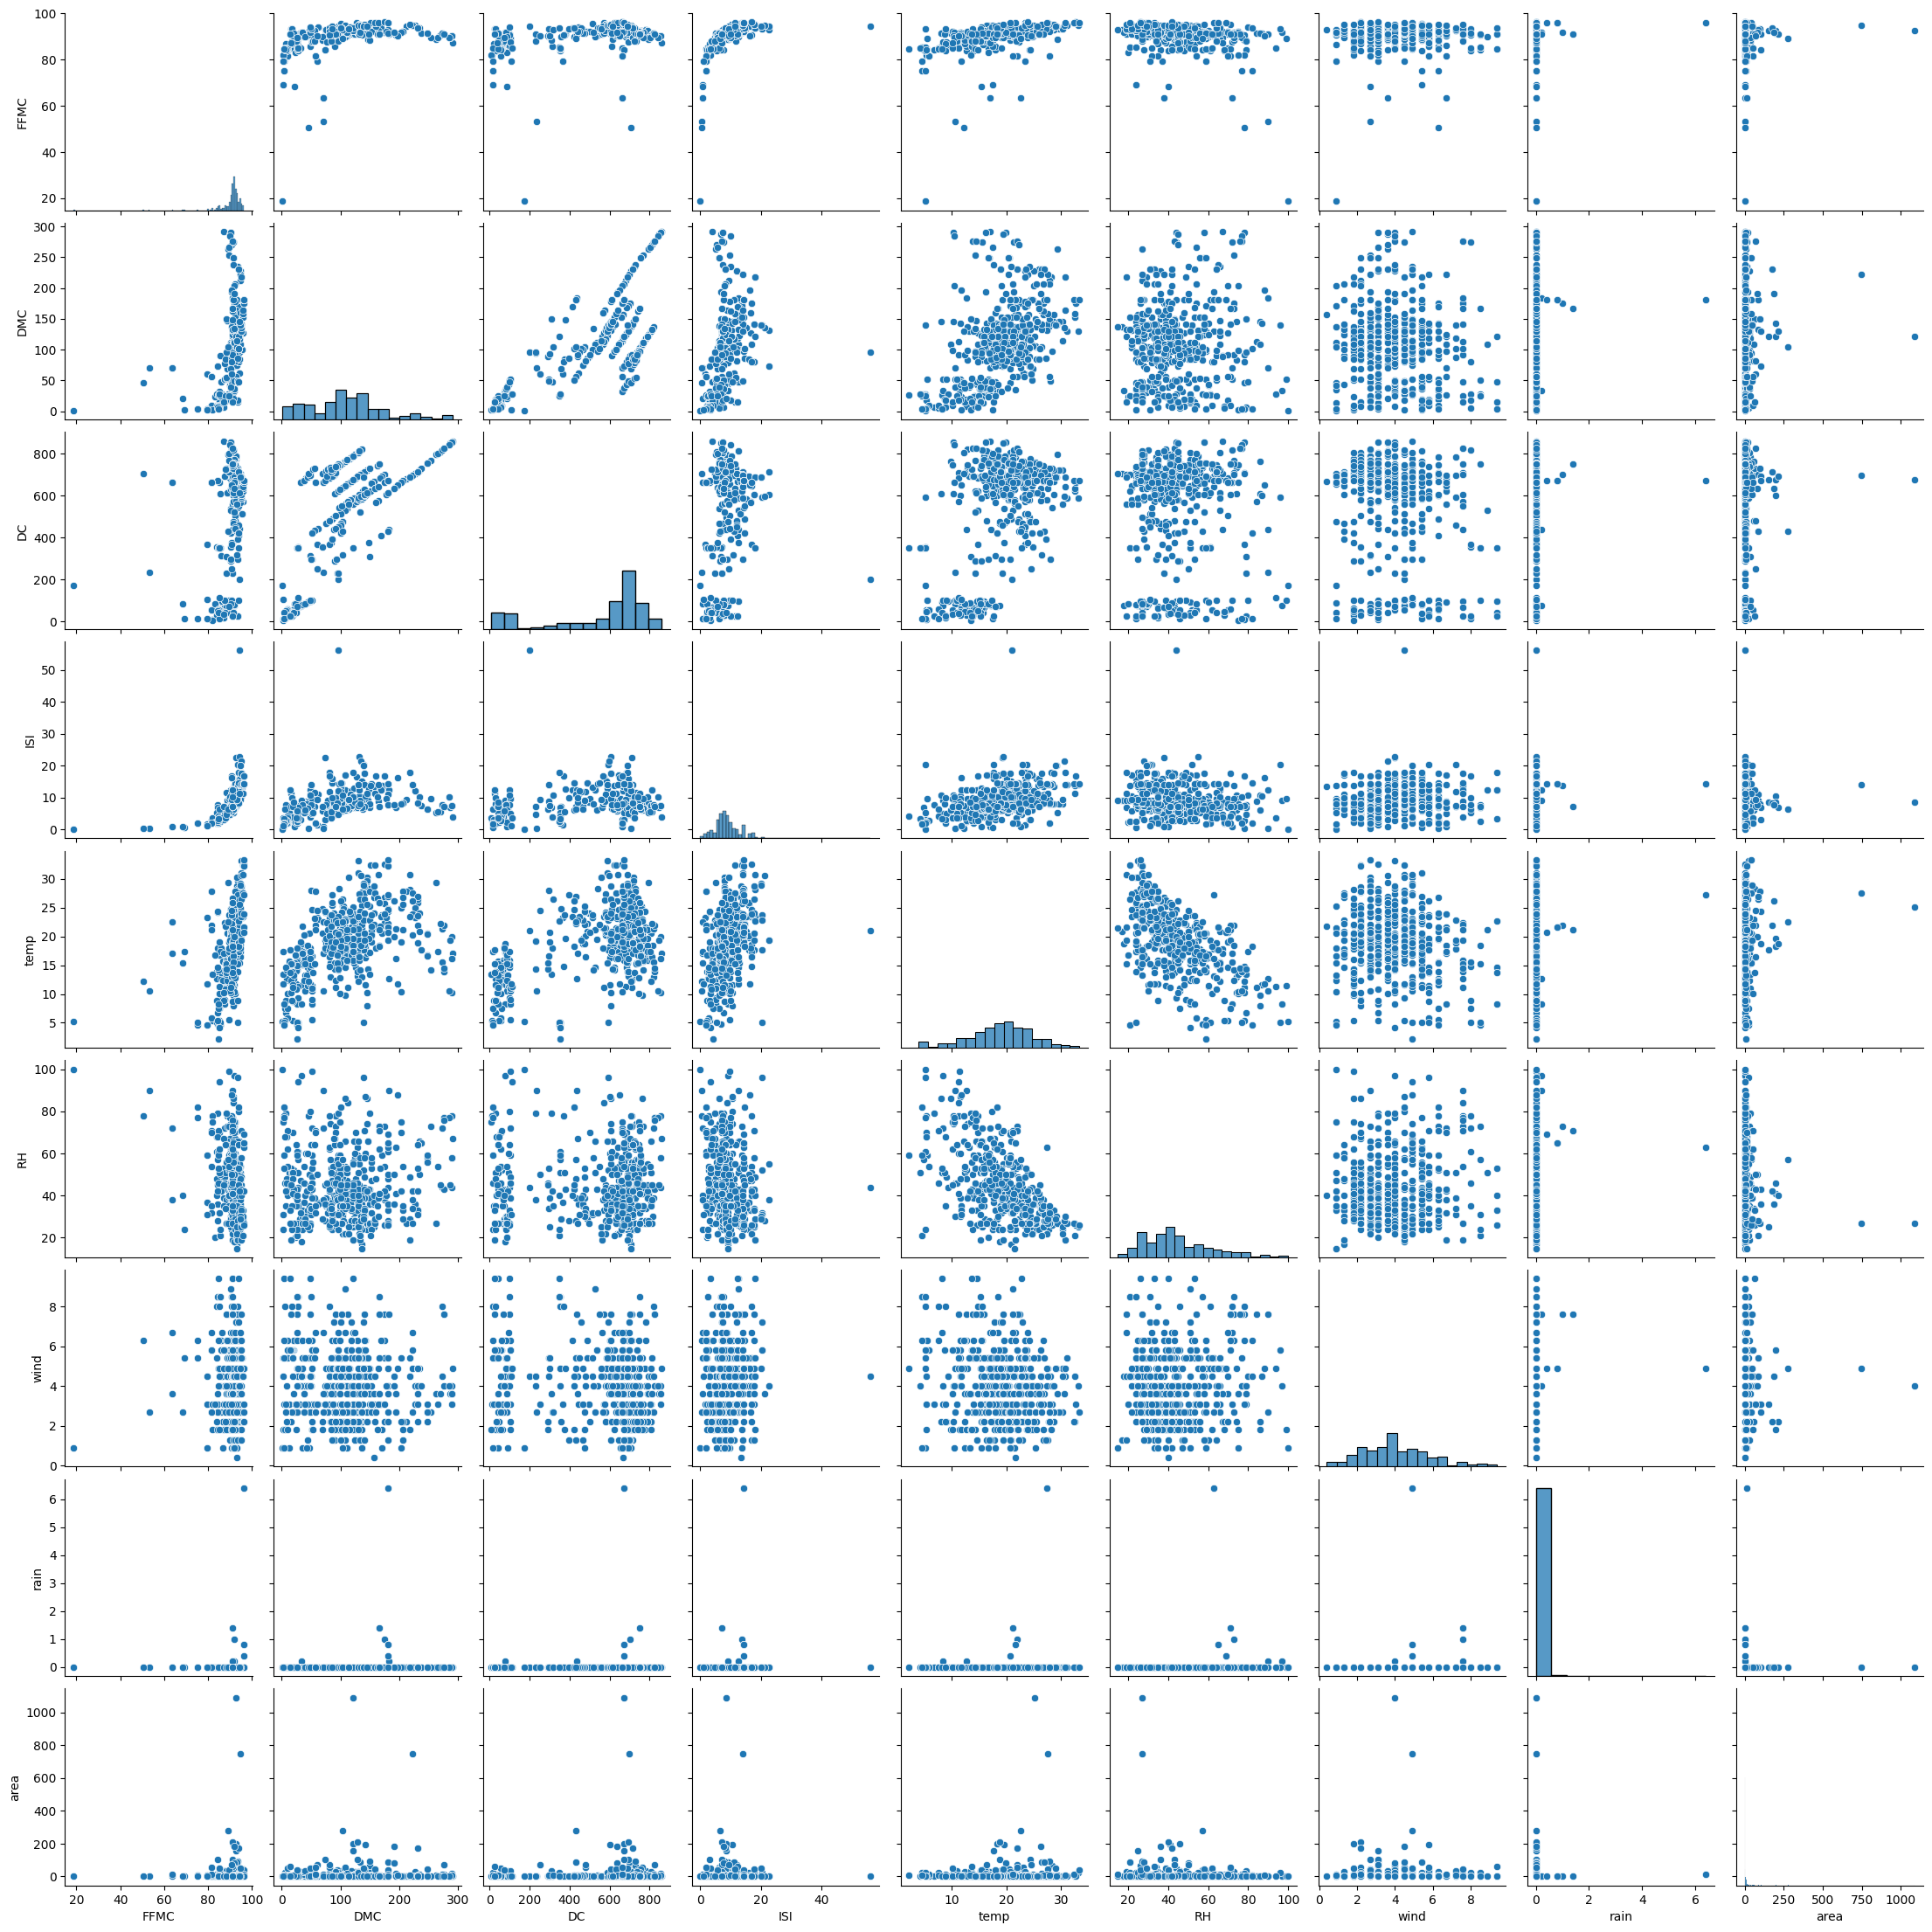

Correlation matrix and pairplots created


In [11]:
# Compute and visualize the correlation matrix for numerical features
plt.figure(figsize=(12, 10))
correlation_matrix = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_matrix_heatmap.png')
plt.show()

# Also, create pairplot for a detailed view
sns.pairplot(df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])
plt.savefig('pairplot_numerical.png')
plt.show()

print("Correlation matrix and pairplots created")

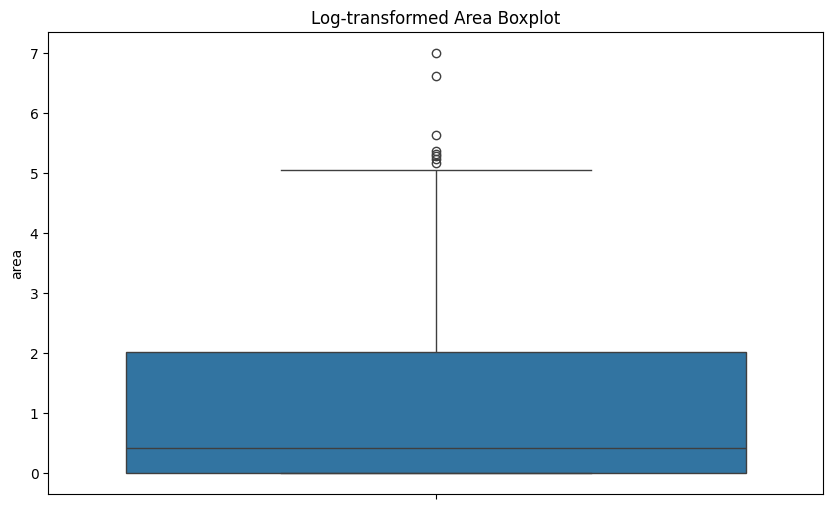

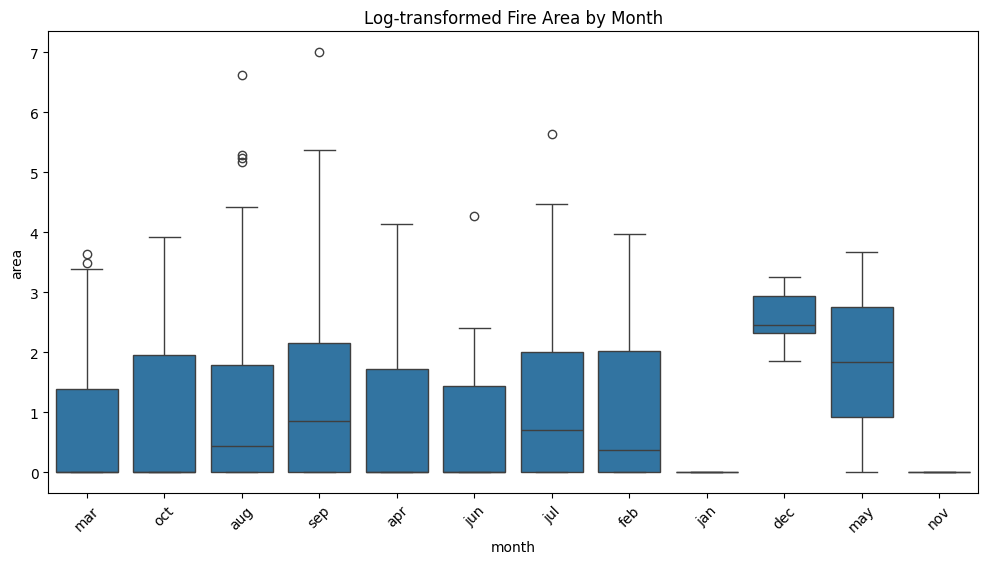

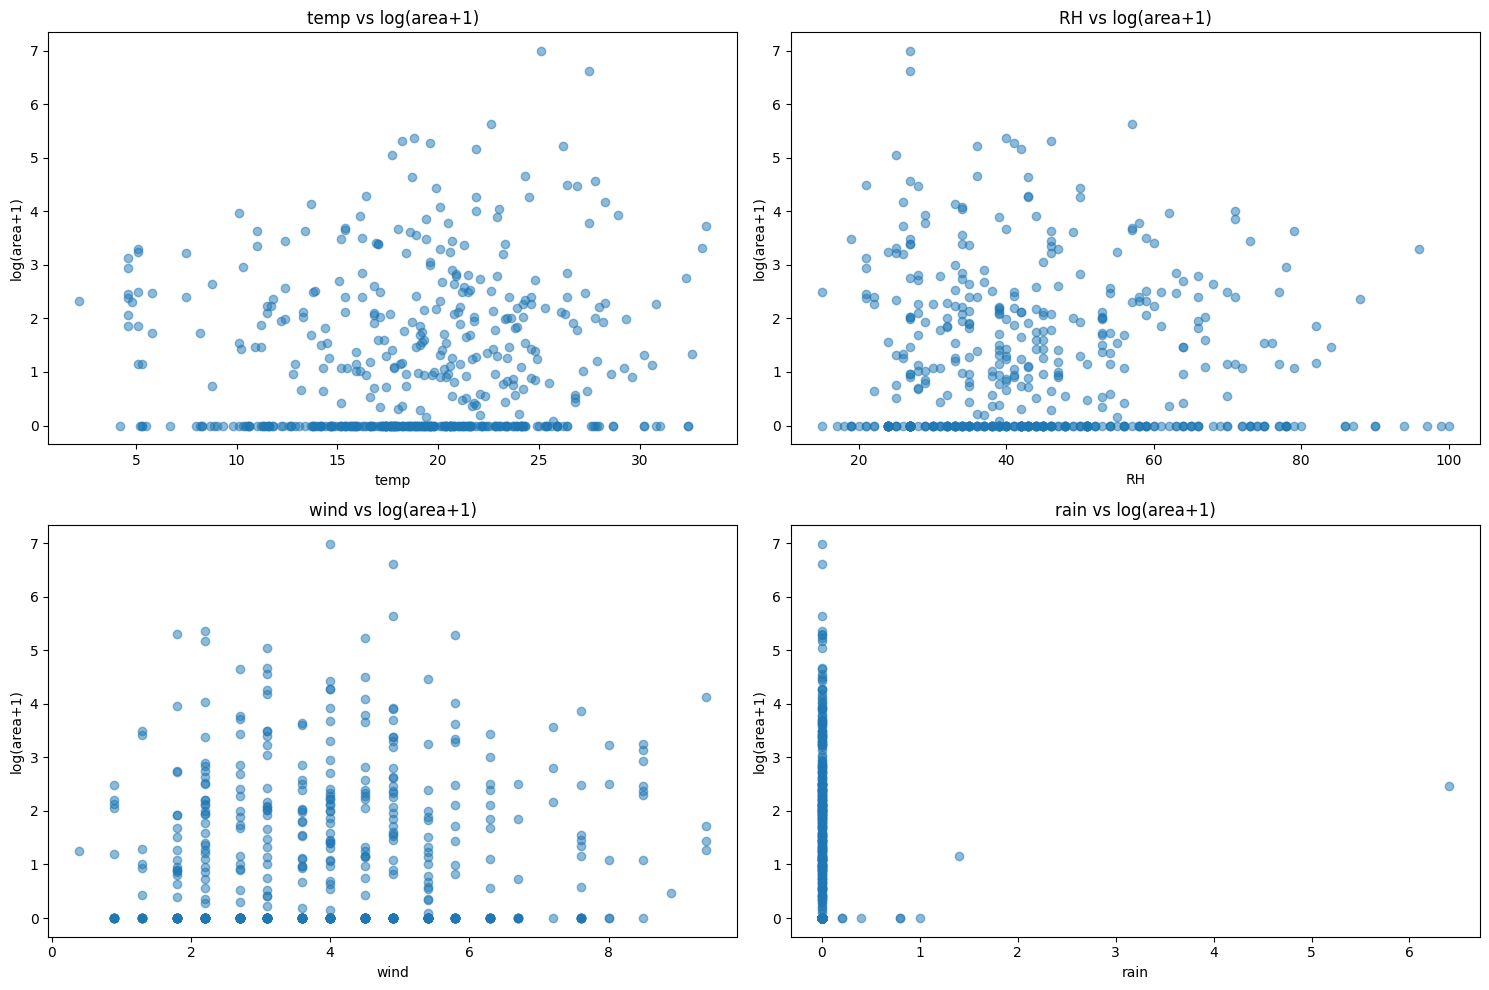

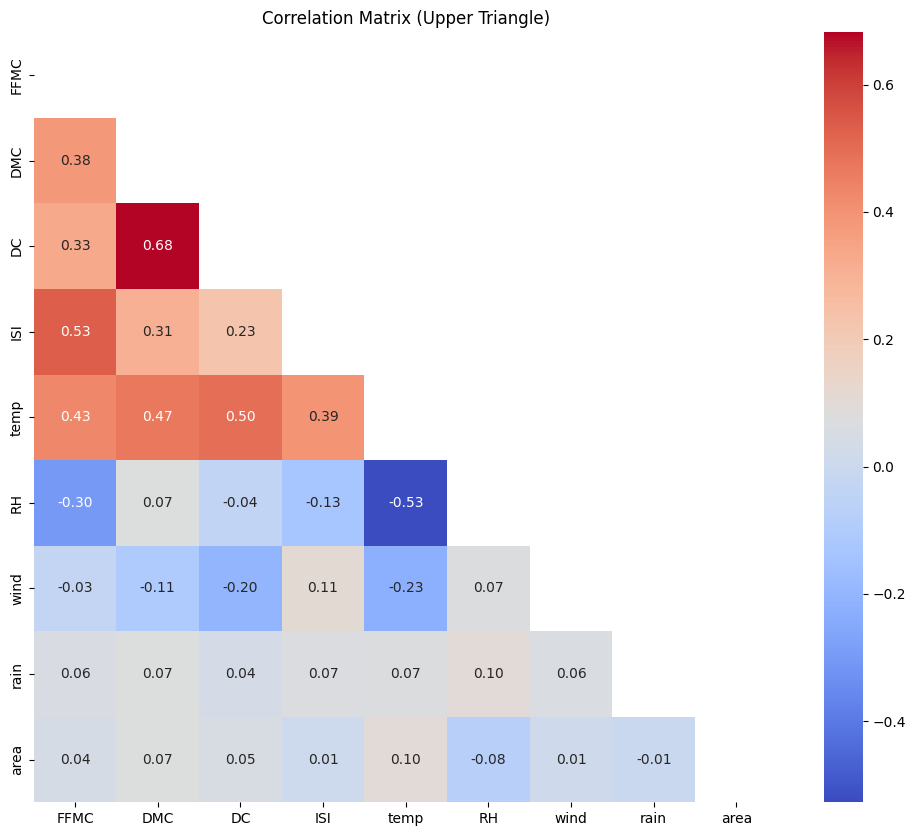

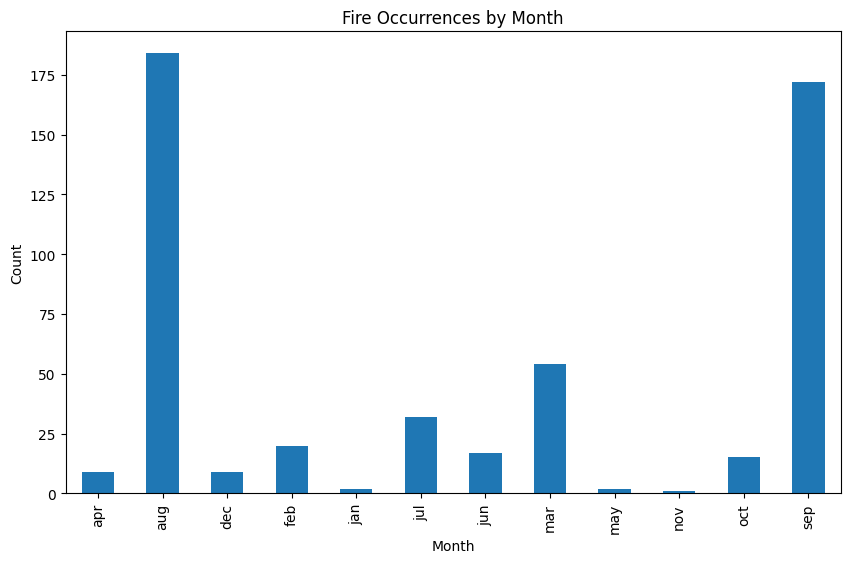

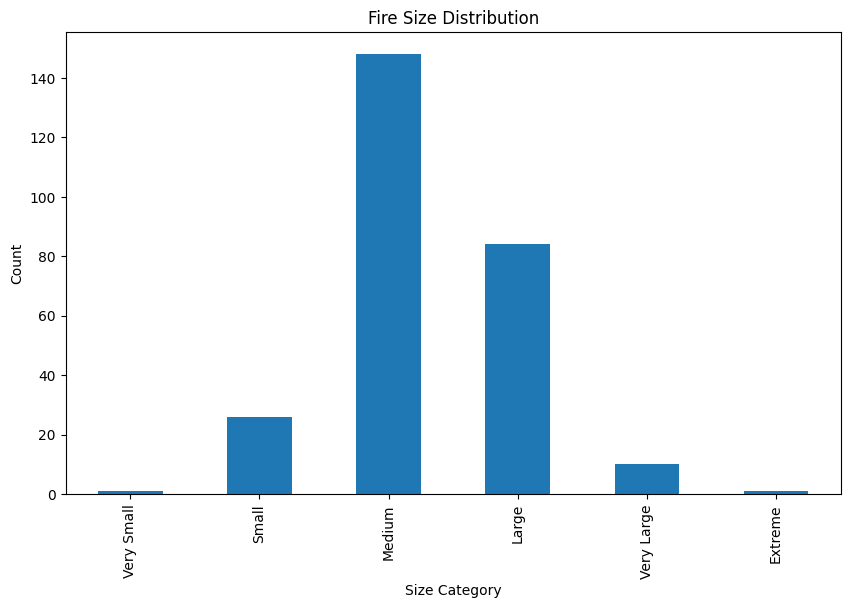

Patterns and anomalies analysis completed


In [12]:
# Let's analyze patterns and anomalies in the dataset

# 1. Check for outliers in the 'area' variable
plt.figure(figsize=(10, 6))
sns.boxplot(y=np.log1p(df['area']))
plt.title('Log-transformed Area Boxplot')
plt.savefig('log_area_boxplot.png')
plt.show()

# 2. Analyze fire area by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y=np.log1p(df['area']), data=df)
plt.title('Log-transformed Fire Area by Month')
plt.xticks(rotation=45)
plt.savefig('area_by_month.png')
plt.show()

# 3. Analyze relationships between weather conditions and fire area
plt.figure(figsize=(15, 10))
for i, col in enumerate(['temp', 'RH', 'wind', 'rain']):
    plt.subplot(2, 2, i+1)
    plt.scatter(df[col], np.log1p(df['area']), alpha=0.5)
    plt.title(f'{col} vs log(area+1)')
    plt.xlabel(col)
    plt.ylabel('log(area+1)')
plt.tight_layout()
plt.savefig('weather_vs_area.png')
plt.show()

# 4. Check for multicollinearity
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Matrix (Upper Triangle)')
plt.savefig('correlation_triangle.png')
plt.show()

# 5. Identify potential patterns in fire occurrence
monthly_counts = df['month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
monthly_counts.plot(kind='bar')
plt.title('Fire Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.savefig('fire_by_month.png')
plt.show()

# 6. Analyze patterns in fire size
df['size_category'] = pd.cut(df['area'],
                            bins=[0, 0.1, 1, 10, 100, 1000, float('inf')],
                            labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large', 'Extreme'])
plt.figure(figsize=(10, 6))
df['size_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Fire Size Distribution')
plt.xlabel('Size Category')
plt.ylabel('Count')
plt.savefig('fire_size_distribution.png')
plt.show()

print("Patterns and anomalies analysis completed")

In [13]:
# Import necessary libraries for machine learning
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare the data
# We'll use the features: X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain
# and the target variable 'area'.
# The columns 'month' and 'day' are categorical, we'll one-hot encode them.

features = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
target = 'area'

# Separate features and target
X_data = df[features]
y_data = df[target]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Build the column transformer: One-hot encode 'month' and 'day'
categorical_features = ['month', 'day']
numerical_features = [col for col in features if col not in categorical_features]

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
    ('num', 'passthrough', numerical_features)
])

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Set up dictionary to store models and their scores
model_results = {}

# 1. Linear Regression
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
lr_mse, lr_r2 = evaluate_model(lr_pipeline, X_test, y_test)
model_results['Linear Regression'] = {'MSE': lr_mse, 'R2': lr_r2}

# 2. Decision Tree Regressor
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', DecisionTreeRegressor(random_state=42))])

dt_pipeline.fit(X_train, y_train)
dt_mse, dt_r2 = evaluate_model(dt_pipeline, X_test, y_test)
model_results['Decision Tree'] = {'MSE': dt_mse, 'R2': dt_r2}

# 3. Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

rf_pipeline.fit(X_train, y_train)
rf_mse, rf_r2 = evaluate_model(rf_pipeline, X_test, y_test)
model_results['Random Forest'] = {'MSE': rf_mse, 'R2': rf_r2}

# Print model results
print('Model Evaluation Results:')
for model_name, metrics in model_results.items():
    print(model_name + ': MSE = ' + str(metrics['MSE']) + ', R2 = ' + str(metrics['R2']))

print('Regression models training and evaluation completed.')

Model Evaluation Results:
Linear Regression: MSE = 11613.674532130412, R2 = 0.014768502010554352
Decision Tree: MSE = 13894.145797355768, R2 = -0.17869241464798336
Random Forest: MSE = 11949.7893229314, R2 = -0.013745374275637712
Regression models training and evaluation completed.
